# Game Theory - Cournot competition

In this project we will investigate in the Cournot competition model to see how firms compete on quantitiies. With an numerical approach, the main objective of the project is to find optimal values given the firms structure and the demand. The baseline model will include a simple demand function and a cost function for the firms which will later be used to look for the best responses. The extended model will look into how a collusion will occur when the two firms in a duopoly market end up with collaborating on quantities.

In [1]:
from scipy import optimize,arange #importing optimize and arange
from numpy import array #importing array
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing plt for plotting in matplotlib
import seaborn as sns
from types import SimpleNamespace
plt.style.use('seaborn-whitegrid')

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

%matplotlib inline

## Demand and cost function
We start by defining the demand function for firm $i$ is as follows :

$$\begin{equation} p_{i,j}(x_i, x_j) = 120-(x_i + x_j) \end{equation}$$

,where $x_i$ is the product produced by firm 1 and $x_j$ is the product produced by firm 2. The products are homogenous. 

The cost function is defined as:

$$\begin{equation} c(x) = cx \end{equation}$$

,where $x$ is the cost for firm 1 or firm 2 since they are symmetrical. We assume constant marginal costs.

In [2]:
def demand_good_x(xi,xj):
    """
    This function decides the demand given the quantity produced by firms i and j. This means that this function decides
    the price of the good. This works because the goods are homogenous and operate under the same market.
    
    xi: The good produced by firm i
    xj: The good produced by firm j
    120: This constant defines the quantity for which demand and thereby the price is equal to zero
    """
    return 120-(xi+xj)


def cost_good_x(x):
    """
    This is the cost function that defines the production costs of good x given the amount produced. 
    The function is of such form that is only catches variable cost, and that there therefore is no fixed costs.
    
    x: the quantity of good x
    """
    return 30*x

## Profits function
The profits for firm i will be (since the firms are symmetrical we can assume the same profit function for firm j):
$$\begin{equation} \pi_i(x_i, x_j)= p_i(x_i,x_j)x_i - c(x) \end{equation}$$
, if we insert the demand and cost function:
$$\begin{equation}  \pi_i(x_i, x_j) = 120-(x_i+x_j) - cx  \end{equation}$$
The total profits in the economy with the two firms will be:
$$\begin{equation}  \Pi_{total}(x_i, x_j) = \pi_i(x_i, x_j) + \pi_j(x_i, x_j)  \end{equation}$$

In [3]:
def profit(xi,xj):
    """
    This profit function is of the original form and is used to find the optimal production.
    
    xi: The good produced by firm i
    xj: The good produced by firm j
    """
    return demand_good_x(xi,xj)*xi-cost_good_x(xi)

## Reaction functions

If we take the derivative of the profits function (firm $i$) with respect to $x_i$ (holding $x_j$ constant) and setting the derivative equal to zero we obtain:

$$\begin{equation} b_i(x_j) = (90-x_j)/2 \end{equation}$$

, thus the best response for firm $i$ is given by the above equation.

Similarily, the best response for firm $j$ will be 


$$\begin{equation} b_j(x_i) = (90-x_i)/2 \end{equation}$$



In [4]:
def best_response(xj):
    """
    This function is derived from the profit function by taking the derevation with regards to xi and isolating xi.
    
    xi: The good produced by firm i
    xj: The good produced by firm j
    """
    xi = (90-xj)/2
    return xi

In [5]:
def vector_best_response(x):
    """
    Now we take the best response functions and generating a vector containing them this is then used to solve the system
    of functions that are driven from earlier functions. Because we are looking for the vector best responce, we minus the
    response functions from an x.
    
    x: creating the difference equation that is optimized.
    """
    return array(x)-array([best_response(x[1]),best_response(x[0])])

We will give x_0 a initial guess, and look for an optimal production for firm $i$ given the demand in the economy and the cost function the firm have

In [6]:
x0 = [40, 40] #Initial guess
results = optimize.fsolve(vector_best_response, x0) #Optimize
print(results)

[30. 30.]


The optimal production is 30 for firm $i$ and this will give the following profit:

In [7]:
print('The profit for firm i is =', profit(results[0],results[1]))

The profit for firm i is = 900.0


## Extension 1 - Collusion

In this part of the project, we are interested in how the firms in the economy will react if a collusion occurs between them. Overall, the theory underlines that when collusions occur between firms in duopoly economies, the profits will tend to be higher (for both firms) than under competition which makes intuitvely good sense. We will try to verify this with the following code.

In [8]:
x_grid = np.linspace(10, 45, 100) #looking for quantities for firms
xvalue = [] #empty list that will be filled out with the x_value that the x-grid decides for quantities
profits = [] #Empty list that will be filled out with the profit for a certain x_value (quantity)

for x in x_grid:
    profit(x,x)
    xvalue.append(x)
    profits.append(profit(x,x))

In [9]:
optimum_profit = max(profits)
optimum_quantity = xvalue[profits.index(max(profits))]

print('The optimal profit occurs when the two companies collude and produce', "%.2f" % optimum_quantity, 'units and gaining', "%.2f" % optimum_profit, 'as profits')

The optimal proft occurs when the two companies collude and produce 22.37 units and gaining 1012.47 as profits


## Plotting the results under collusion

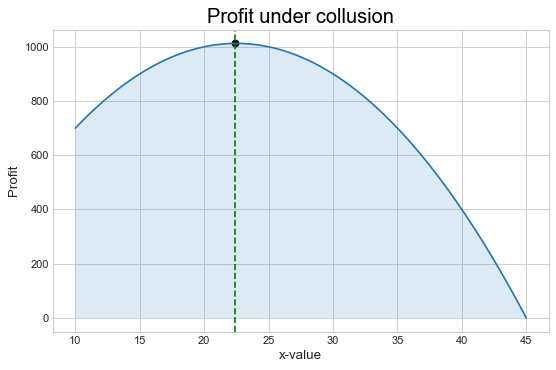

In [10]:
fig = plt.figure(figsize=(8, 5), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.plot(xvalue,profits)
ax.set_xlabel('x-value', fontsize=12)
ax.set_ylabel('Profit', fontsize=12)
ax.set_title('Profit under collusion', color='black', fontsize=18)
ax.axvline(x=optimum_quantity, color='green',linestyle = 'dashed')
ax.scatter(optimum_quantity,optimum_profit, color='black')
ax.fill_between(xvalue,profits, alpha=0.15)


## Extension 2 - Deviation from collusion

In this extension we are interested in the dynamics when firm i or j deviates from the collusion strategy. This can be interesting to look if for the firm i there is anything to gain deviating from this strategy.

In [16]:
x_grid_deviate = np.linspace(10, 60, 100) #Make a new grid for the x values when deviation occurs
xvalue_deviate = [] ##empty list that will be filled out with the x_value  that the x-grid decides for quantities under deviation
profits_deviate = [] #Empty list that will be filled out with the profit for a certain x_value (quantity) under deviation

for x in x_grid_deviate:
    xvalue_deviate.append(x)
    profits_deviate.append(profit(x,optimum_quantity))

In [27]:
optimum_profit_deviate = max(profits_deviate)
optimum_quantity_deviate = xvalue_deviate[profits_deviate.index(max(profits_deviate))]

print('The optimal profit when firm i chooses to deviate from collution is', "%.2f" % optimum_profit_deviate, 'and the quantity will be optimal at', "%.2f" % optimum_quantity_deviate, '')

The optimal profit when firm i chooses to deviate from collution is 1143.32 and the quantity will be optimal at 33.74 


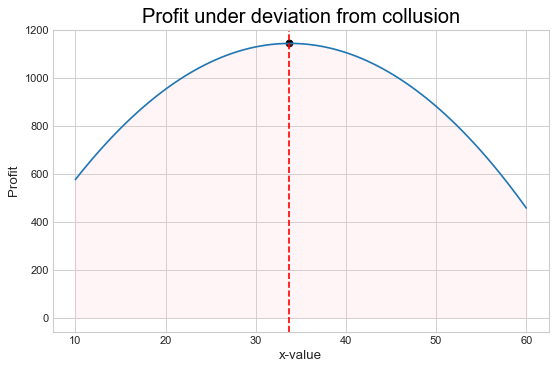

In [19]:
fig = plt.figure(figsize=(8, 5), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.plot(xvalue_deviate,profits_deviate)
ax.set_xlabel('x-value', fontsize=12)
ax.set_ylabel('Profit', fontsize=12)
ax.set_title('Profit under deviation from collusion', fontsize=18, color='black')
ax.axvline(x=optimum_quantity_deviate, color='red',linestyle = 'dashed')
ax.scatter(optimum_quantity_deviate,optimum_profit_deviate, color='black')
ax.fill_between(xvalue_deviate,profits_deviate, color='pink', alpha=0.15)

In [37]:
profit_collude = optimum_profit+optimum_profit
profit_deviate = optimum_profit_deviate + profit(optimum_quantity, optimum_quantity_deviate) #since firm i chooses to deviate this must mean that firm j can only get

print(profit_collude, profit_deviate)

2024.9362309968374 1901.543209876543


## Simulation - Trigger and Tit for tat strategy